Este notebook tiene la intención de eliminar variables correlacionadas, unir las tablas y rellenar valores. Además de eliminar variables quasiconstantes con un criterio más estricto.

In [27]:
#Exportamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('/Users/wilbertpeniche/Desktop/credit risk /bC.csv')


In [12]:
df

,SK_ID_CURR,CREDIT_ACTIVE,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM,DAYS_CREDIT_UPDATE,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,MONTHS_BALANCE,STATUS_0,STATUS_C,STATUS_X
0,166497.0,0.0,-2918.0,-2613.0,29443.50,-1227.0,1.0,0.0,-41.0,0.060241,0.578313,0.361446
1,166497.0,0.0,-1015.0,-831.0,13810.50,-891.0,1.0,0.0,-41.0,0.060241,0.578313,0.361446
2,166497.0,0.0,-149.0,-26.0,13455.00,-23.0,1.0,0.0,-41.0,0.060241,0.578313,0.361446
3,166497.0,0.0,-135.0,230.0,37350.00,-42.0,1.0,0.0,-41.0,0.060241,0.578313,0.361446
4,166497.0,1.0,-47.0,320.0,315127.62,-17.0,1.0,0.0,-41.0,0.060241,0.578313,0.361446
...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,134450.0,1.0,-2385.0,-1645.0,135000.00,-1652.0,1.0,0.0,NaN,NaN,NaN,NaN
1716424,134450.0,0.0,-700.0,-335.0,67500.00,-330.0,1.0,0.0,NaN,NaN,NaN,NaN
1716425,134450.0,1.0,-301.0,1534.0,67500.00,-23.0,0.0,0.0,NaN,NaN,NaN,NaN
1716426,134450.0,0.0,-1395.0,-299.0,225000.00,-523.0,1.0,0.0,NaN,NaN,NaN,NaN


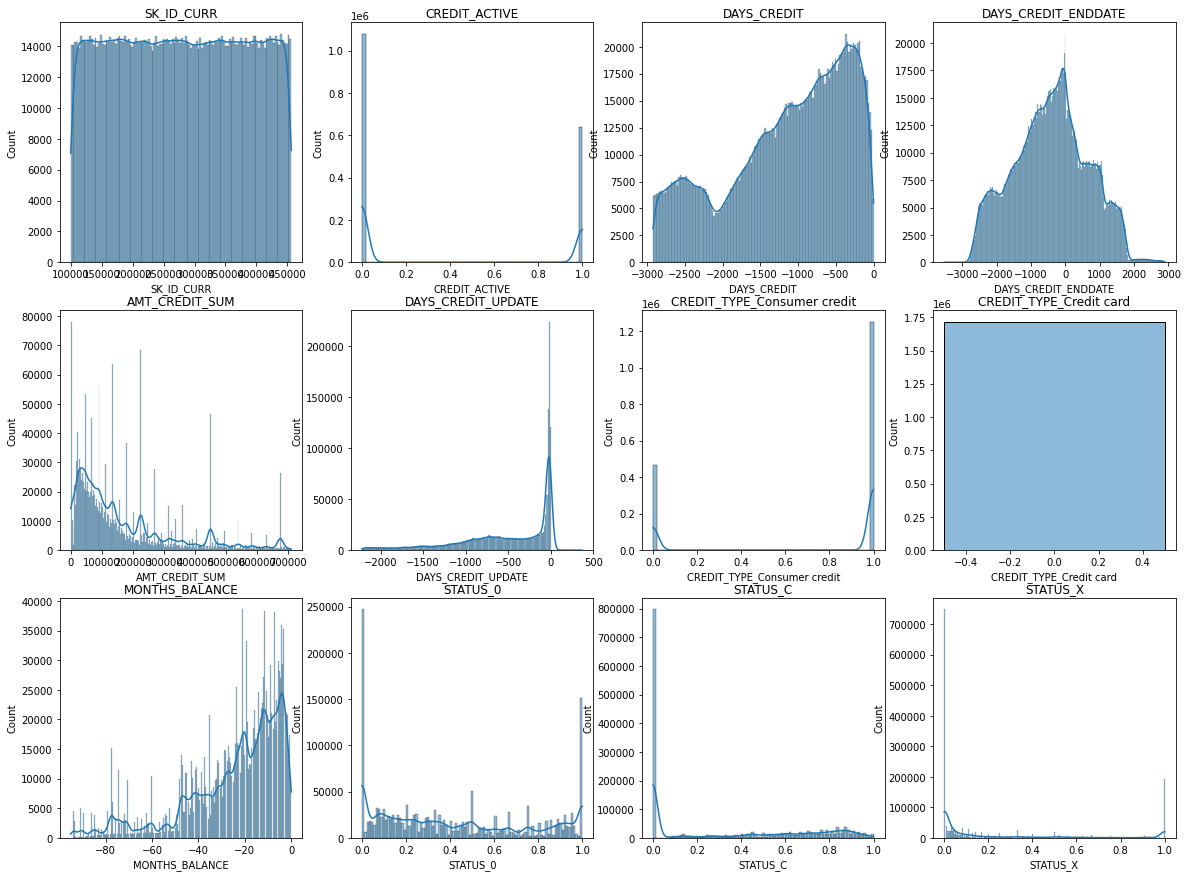

In [15]:
#hacemos una función que nos grafique cada variable para notar algo más falta por hacer.
def graficar_histogramas(dataframe:pd.DataFrame):
    # Filtrar las columnas numéricas
    columnas_numericas = dataframe.select_dtypes(include=[np.number]).columns
    
    # Calcular el número de filas necesarias en función de las columnas numéricas
    num_filas = (len(columnas_numericas) + 3) // 4

    # Crear una figura con varios subplots (4 x n)
    fig, axes = plt.subplots(num_filas, 4, figsize=(20, 5 * num_filas))
    axes = axes.flatten()

    # Iterar sobre las columnas numéricas y graficar un histograma para cada una
    for i, columna in enumerate(columnas_numericas):
        sns.histplot(data=dataframe, x=columna, kde=True, ax=axes[i])
        axes[i].set_title(columna)

    # Eliminar los subplots vacíos
    for i in range(len(columnas_numericas), len(axes)):
        fig.delaxes(axes[i])

    # Mostrar la figura con los histogramas
    plt.show()
graficar_histogramas(df)

In [5]:
#Programamos una función que elimina las variables constantes del df.
def eliminar_columnas_constantes(dataframe:pd.DataFrame) -> pd.DataFrame:
    columnas_constantes = []
    
    for columna in dataframe.columns:
        if dataframe[columna].nunique() == 1:
            columnas_constantes.append(columna)
            
    return dataframe.drop(columnas_constantes, axis=1)

eliminar_columnas_constantes(df)

In [13]:
eliminar_columnas_constantes(df)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,HOUR_APPR_PROCESS_START,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,NAME_CONTRACT_TYPE_Consumer loans,NAME_CASH_LOAN_PURPOSE_XAP,NAME_PAYMENT_TYPE_XNA,NAME_CLIENT_TYPE_Repeater,NAME_PORTFOLIO_Cash,NAME_PRODUCT_TYPE_x-sell,CHANNEL_TYPE_Country-wide,CHANNEL_TYPE_Credit and cash offices
0,2030495,271877,1730.430000,17145.000000,15.0,-73.0,35.000000,12.0,1,1,0,1,0,0,1,0
1,2802425,108129,25188.615000,172941.136337,11.0,-164.0,-1.000000,36.0,0,0,1,1,1,1,0,0
2,2523466,122040,15060.735000,112500.000000,11.0,-301.0,-1.000000,12.0,0,0,0,1,1,1,0,1
3,2819243,176158,21911.273675,281069.769669,7.0,-512.0,-1.000000,12.0,0,0,0,1,1,1,0,1
4,1784265,202054,31924.395000,337500.000000,9.0,-781.0,-1.000000,24.0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,14704.290000,267295.500000,12.0,-544.0,43.000000,30.0,1,1,0,0,0,0,0,0
1670210,2357031,334635,6622.020000,87750.000000,15.0,-1694.0,43.000000,12.0,1,1,0,0,0,0,0,0
1670211,2659632,249544,11520.855000,105237.000000,12.0,-1488.0,57.774135,10.0,1,1,0,1,0,0,1,0
1670212,2785582,400317,18821.520000,180000.000000,9.0,-1185.0,-1.000000,12.0,0,0,0,1,1,1,0,0


In [ ]:
def eliminar_columnas_quasiconstantes(dataframe:pd.DataFrame, threshold:int=0.99) ->pd.DataFrame:
    columnas_quasiconstantes = []
    
    for columna in dataframe.columns:
        dominant_value_freq = dataframe[columna].value_counts(normalize=True).sort_values(ascending = True).iloc[0]
        if dominant_value_freq >= threshold:
            columnas_quasiconstantes.append(columna)
            
    return dataframe.drop(columnas_quasiconstantes, axis=1)

df_sin_quasiconstantes = eliminar_columnas_quasiconstantes(df, threshold=0.97)
print(df_sin_quasiconstantes)

eliminar_columnas_quasiconstantes(df,0.9)

In [14]:
# esta función tiene como theshold el porcentaje de valores = 0, arriba del porcentaje deseado de valores 0 en una variable 
# la función transforma los valores positivos a 1, haciendo la variable binaria, en caso de que tenga valores negativos hace 3 variables dummies
# Una variable dummy marcando 1 si es valor negativo, cero o positivo.
def transformar_columnas_numericas(dataframe:pd.DataFrame, threshold:int=0.1)->pd.DataFrame:
    columnas_transformadas = []
    
    for columna in dataframe.columns:
        zero_count = (dataframe[columna] == 0).sum()
        total_count = len(dataframe[columna])
        zero_percentage = zero_count / total_count

        if zero_percentage >= threshold:
            if dataframe[columna].lt(0).any():  # Si hay valores negativos
                dataframe[f'{columna}_neg'] = (dataframe[columna] < 0).astype(int)
                dataframe[f'{columna}_cero'] = (dataframe[columna] == 0).astype(int)
                dataframe[f'{columna}_pos'] = (dataframe[columna] > 0).astype(int)
                columnas_transformadas.append(columna)
            else:  # Si solo hay valores positivos y ceros
                dataframe[columna] = (dataframe[columna] > 0).astype(int)

    # Eliminar las columnas originales transformadas en tres columnas dummy
    dataframe = dataframe.drop(columnas_transformadas, axis=1)
    return dataframe

In [15]:
df = transformar_columnas_numericas(df)

In [16]:
df =eliminar_variables_correlacionadas(df,threshold=90)

/var/folders/v2/pq1tvmjx777fhcpd1y0mzr_80000gn/T/ipykernel_70013/4028964440.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [17]:
df

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,NAME_CONTRACT_TYPE_Consumer loans,...,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS mobile with interest
0,2030495,271877,1730.430000,1,15.0,1.0,-73.0,35.000000,12.0,1,...,0,0,0,0,0,0,0,0,0,0
1,2802425,108129,25188.615000,1,11.0,1.0,-164.0,-1.000000,36.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2523466,122040,15060.735000,1,11.0,1.0,-301.0,-1.000000,12.0,0,...,0,0,0,0,0,0,0,0,0,0
3,2819243,176158,21911.273675,1,7.0,1.0,-512.0,-1.000000,12.0,0,...,0,0,0,0,0,0,0,0,0,0
4,1784265,202054,31924.395000,1,9.0,1.0,-781.0,-1.000000,24.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,14704.290000,1,12.0,1.0,-544.0,43.000000,30.0,1,...,0,0,0,0,0,0,0,0,0,0
1670210,2357031,334635,6622.020000,1,15.0,1.0,-1694.0,43.000000,12.0,1,...,0,0,0,0,0,0,0,0,0,0
1670211,2659632,249544,11520.855000,1,12.0,1.0,-1488.0,57.774135,10.0,1,...,0,0,0,0,0,0,0,0,0,0
1670212,2785582,400317,18821.520000,1,9.0,1.0,-1185.0,-1.000000,12.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.groupby("SK_ID_CURR").max()

In [18]:
df.to_csv('bC.csv', index=False)
df.to_csv('/Users/wilbertpeniche/Desktop/homeCreditKaggle/credit risk /bC.csv',index= False)

In [120]:
df = pd.read_csv('/Users/wilbertpeniche/Desktop/homeCreditKaggle/credit risk /app_train_cleaned.csv')

In [121]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,FLAG_DOCUMENT_3
0,100002,1,1.0,1,202500.0,406597.5,24700.5,-9461,-637.000000,-3648.0,-2120,1.0,1
1,100003,0,1.0,0,270000.0,1293502.5,35698.5,-16765,-1188.000000,-1186.0,-291,2.0,1
2,100004,0,1.0,1,67500.0,135000.0,6750.0,-19046,-225.000000,-4260.0,-2531,1.0,0
3,100006,0,1.0,1,135000.0,312682.5,29686.5,-19005,-3039.000000,-9833.0,-2437,2.0,1
4,100007,0,1.0,1,121500.0,513000.0,21865.5,-19932,-3038.000000,-4311.0,-3458,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1.0,0,157500.0,254700.0,27558.0,-9327,-236.000000,-8456.0,-1982,1.0,0
307507,456252,0,1.0,1,72000.0,269550.0,12001.5,-20775,-1837.193259,-4388.0,-4090,1.0,1
307508,456253,0,1.0,1,153000.0,677664.0,29979.0,-14966,-1837.193259,-6737.0,-5150,1.0,1
307509,456254,1,1.0,1,171000.0,370107.0,20205.0,-11961,-4786.000000,-2562.0,-931,2.0,1


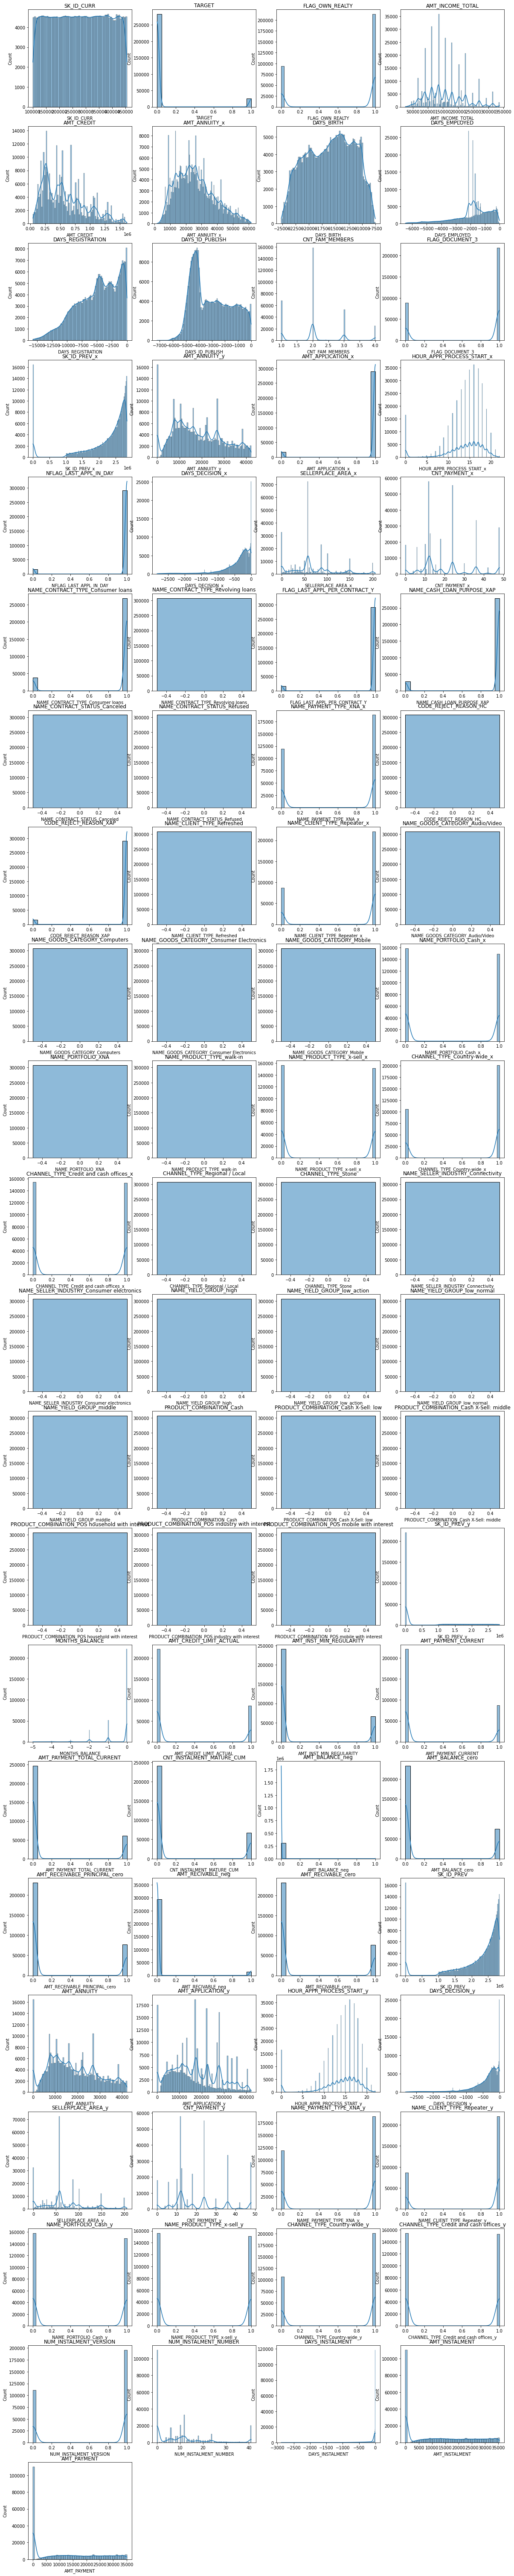

In [147]:
graficar_histogramas(df)

In [122]:
eliminar_columnas_constantes(df)

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,FLAG_DOCUMENT_3
0,100002,1,1,202500.0,406597.5,24700.5,-9461,-637.000000,-3648.0,-2120,1.0,1
1,100003,0,0,270000.0,1293502.5,35698.5,-16765,-1188.000000,-1186.0,-291,2.0,1
2,100004,0,1,67500.0,135000.0,6750.0,-19046,-225.000000,-4260.0,-2531,1.0,0
3,100006,0,1,135000.0,312682.5,29686.5,-19005,-3039.000000,-9833.0,-2437,2.0,1
4,100007,0,1,121500.0,513000.0,21865.5,-19932,-3038.000000,-4311.0,-3458,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,-9327,-236.000000,-8456.0,-1982,1.0,0
307507,456252,0,1,72000.0,269550.0,12001.5,-20775,-1837.193259,-4388.0,-4090,1.0,1
307508,456253,0,1,153000.0,677664.0,29979.0,-14966,-1837.193259,-6737.0,-5150,1.0,1
307509,456254,1,1,171000.0,370107.0,20205.0,-11961,-4786.000000,-2562.0,-931,2.0,1


In [124]:
df = df_sin_quasiconstantes

In [125]:
df

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,FLAG_DOCUMENT_3
0,100002,1,1,202500.0,406597.5,24700.5,-9461,-637.000000,-3648.0,-2120,1.0,1
1,100003,0,0,270000.0,1293502.5,35698.5,-16765,-1188.000000,-1186.0,-291,2.0,1
2,100004,0,1,67500.0,135000.0,6750.0,-19046,-225.000000,-4260.0,-2531,1.0,0
3,100006,0,1,135000.0,312682.5,29686.5,-19005,-3039.000000,-9833.0,-2437,2.0,1
4,100007,0,1,121500.0,513000.0,21865.5,-19932,-3038.000000,-4311.0,-3458,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,-9327,-236.000000,-8456.0,-1982,1.0,0
307507,456252,0,1,72000.0,269550.0,12001.5,-20775,-1837.193259,-4388.0,-4090,1.0,1
307508,456253,0,1,153000.0,677664.0,29979.0,-14966,-1837.193259,-6737.0,-5150,1.0,1
307509,456254,1,1,171000.0,370107.0,20205.0,-11961,-4786.000000,-2562.0,-931,2.0,1


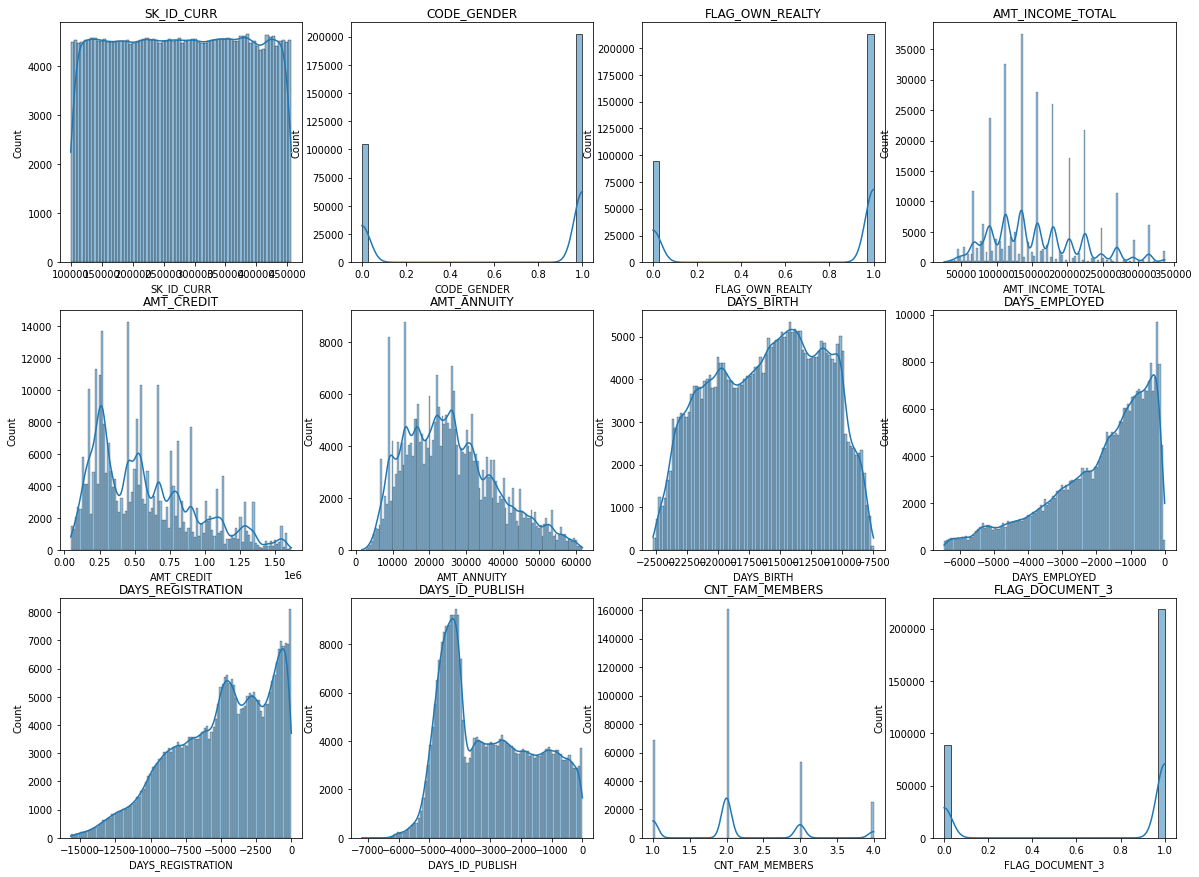

In [40]:
graficar_histogramas(df)

In [126]:
df.to_csv('app_train_cleaned.csv', index=False)
df.to_csv('/Users/wilbertpeniche/Desktop/homeCreditKaggle/credit risk /app_train_cleaned.csv',index= False)

Ahora que tenemos todas las variables limpias, es momento de juntar las variables más importantes


pero primero haré experimentos con los groupbys, hay que saber que tanto cambian los datos si usamos valores maximos o promedio

In [35]:
df = pd.read_csv('/Users/wilbertpeniche/Desktop/homeCreditKaggle/credit risk /insPay.csv')

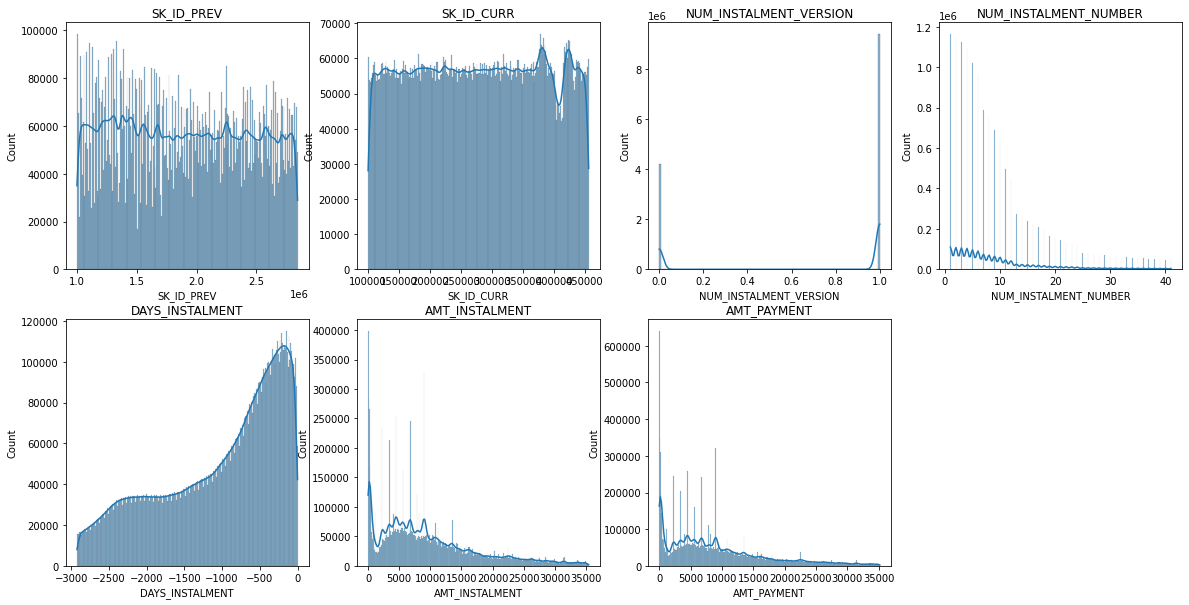

In [49]:
graficar_histogramas(df)

In [36]:
df = df.groupby("SK_ID_CURR").max()

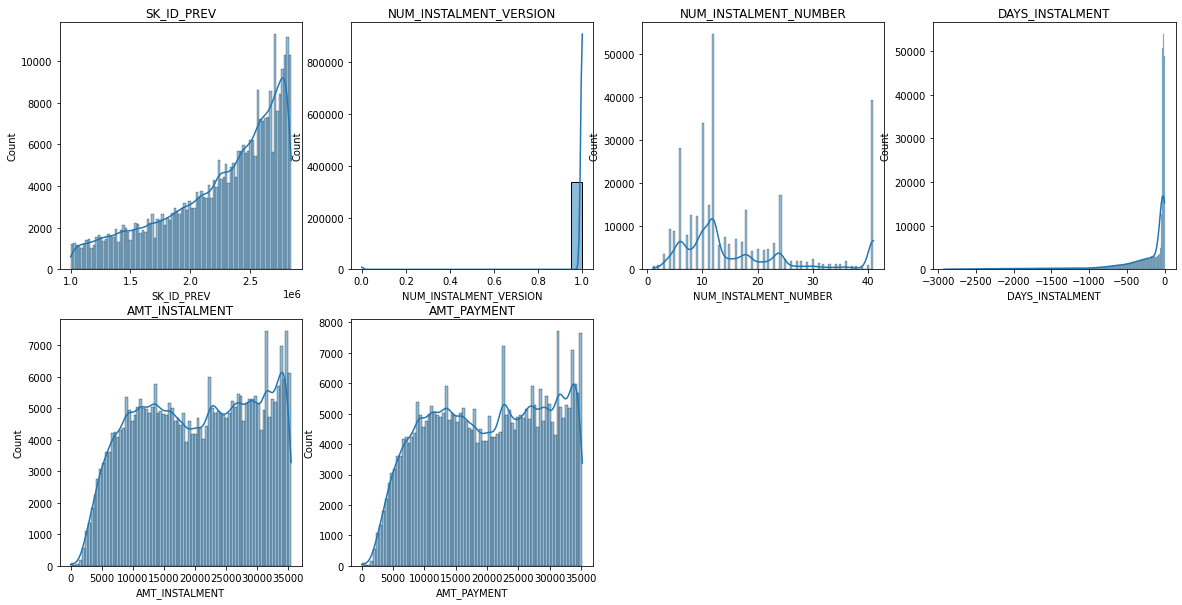

In [52]:
graficar_histogramas(df)

In [55]:
df = df.groupby("SK_ID_CURR").mean()

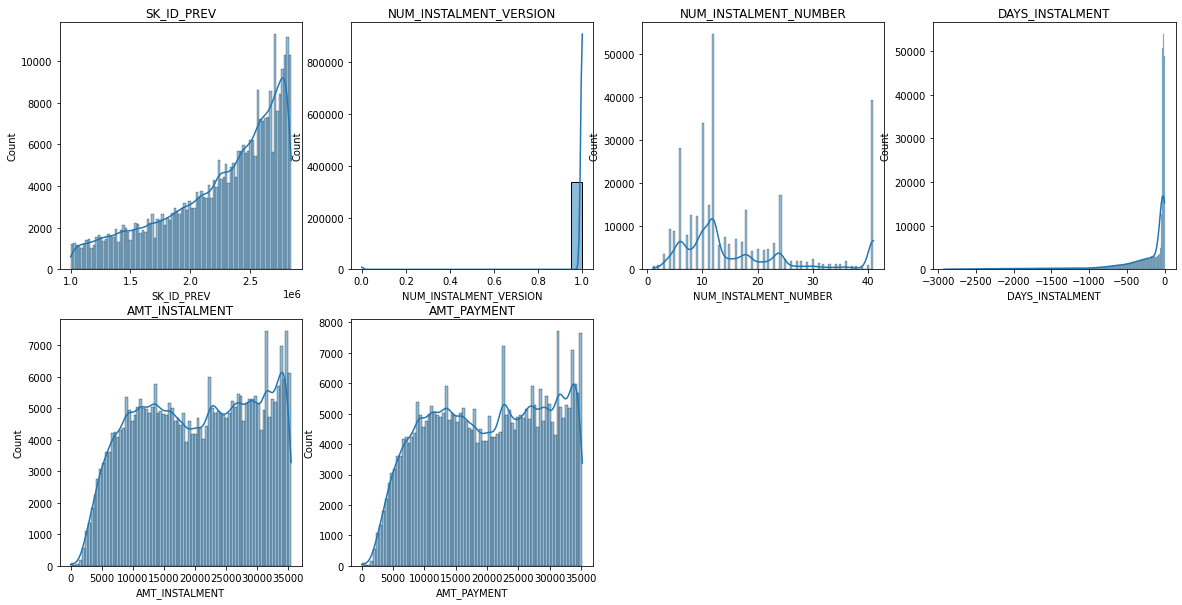

In [56]:
graficar_histogramas(df)

In [56]:
df

,SK_ID_CURR,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100001,1851984,1,4.0,-1619.0,17397.900,17397.900
1,100002,1038818,1,19.0,-25.0,9251.775,9251.775
2,100003,2636178,1,12.0,-536.0,25396.335,25396.335
3,100004,1564014,1,3.0,-724.0,10573.965,10573.965
4,100005,2495675,1,9.0,-466.0,17656.245,17656.245
...,...,...,...,...,...,...,...
339582,456251,2248017,1,7.0,-30.0,12815.010,12815.010
339583,456252,1503599,1,6.0,-2316.0,10074.465,10074.465
339584,456253,2029307,1,12.0,-1716.0,5575.185,5575.185
339585,456254,2016407,1,10.0,-7.0,19065.825,19065.825


In [37]:
df.to_csv('insPay.csv', index=False)
df.to_csv('/Users/wilbertpeniche/Desktop/homeCreditKaggle/credit risk /insPay.csv',index= False)

In [38]:
df = pd.read_csv('/Users/wilbertpeniche/Desktop/homeCreditKaggle/credit risk /prev_app.csv')

In [ ]:
#usamos una función que elimina las variables correlacionadas, con un threshold por defecto del .95
def eliminar_variables_correlacionadas(dataframe:pd.DataFrame, threshold:int =0.95) -> pd.DataFrame:

    corr_matrix = dataframe.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    columnas_eliminar = [columna for columna in upper_tri.columns if any(upper_tri[columna] > threshold)]

    return dataframe.drop(columnas_eliminar, axis=1)

In [ ]:
df = eliminar_variables_correlacionadas(df, threshold=.80)

In [ ]:
df

In [ ]:
#Programamos una función que elimina las variables constantes del df.
def eliminar_columnas_constantes(dataframe:pd.DataFrame) -> pd.DataFrame:
    columnas_constantes = []
    
    for columna in dataframe.columns:
        if dataframe[columna].nunique() == 1:
            columnas_constantes.append(columna)
            
    return dataframe.drop(columnas_constantes, axis=1)

eliminar_columnas_constantes(df)

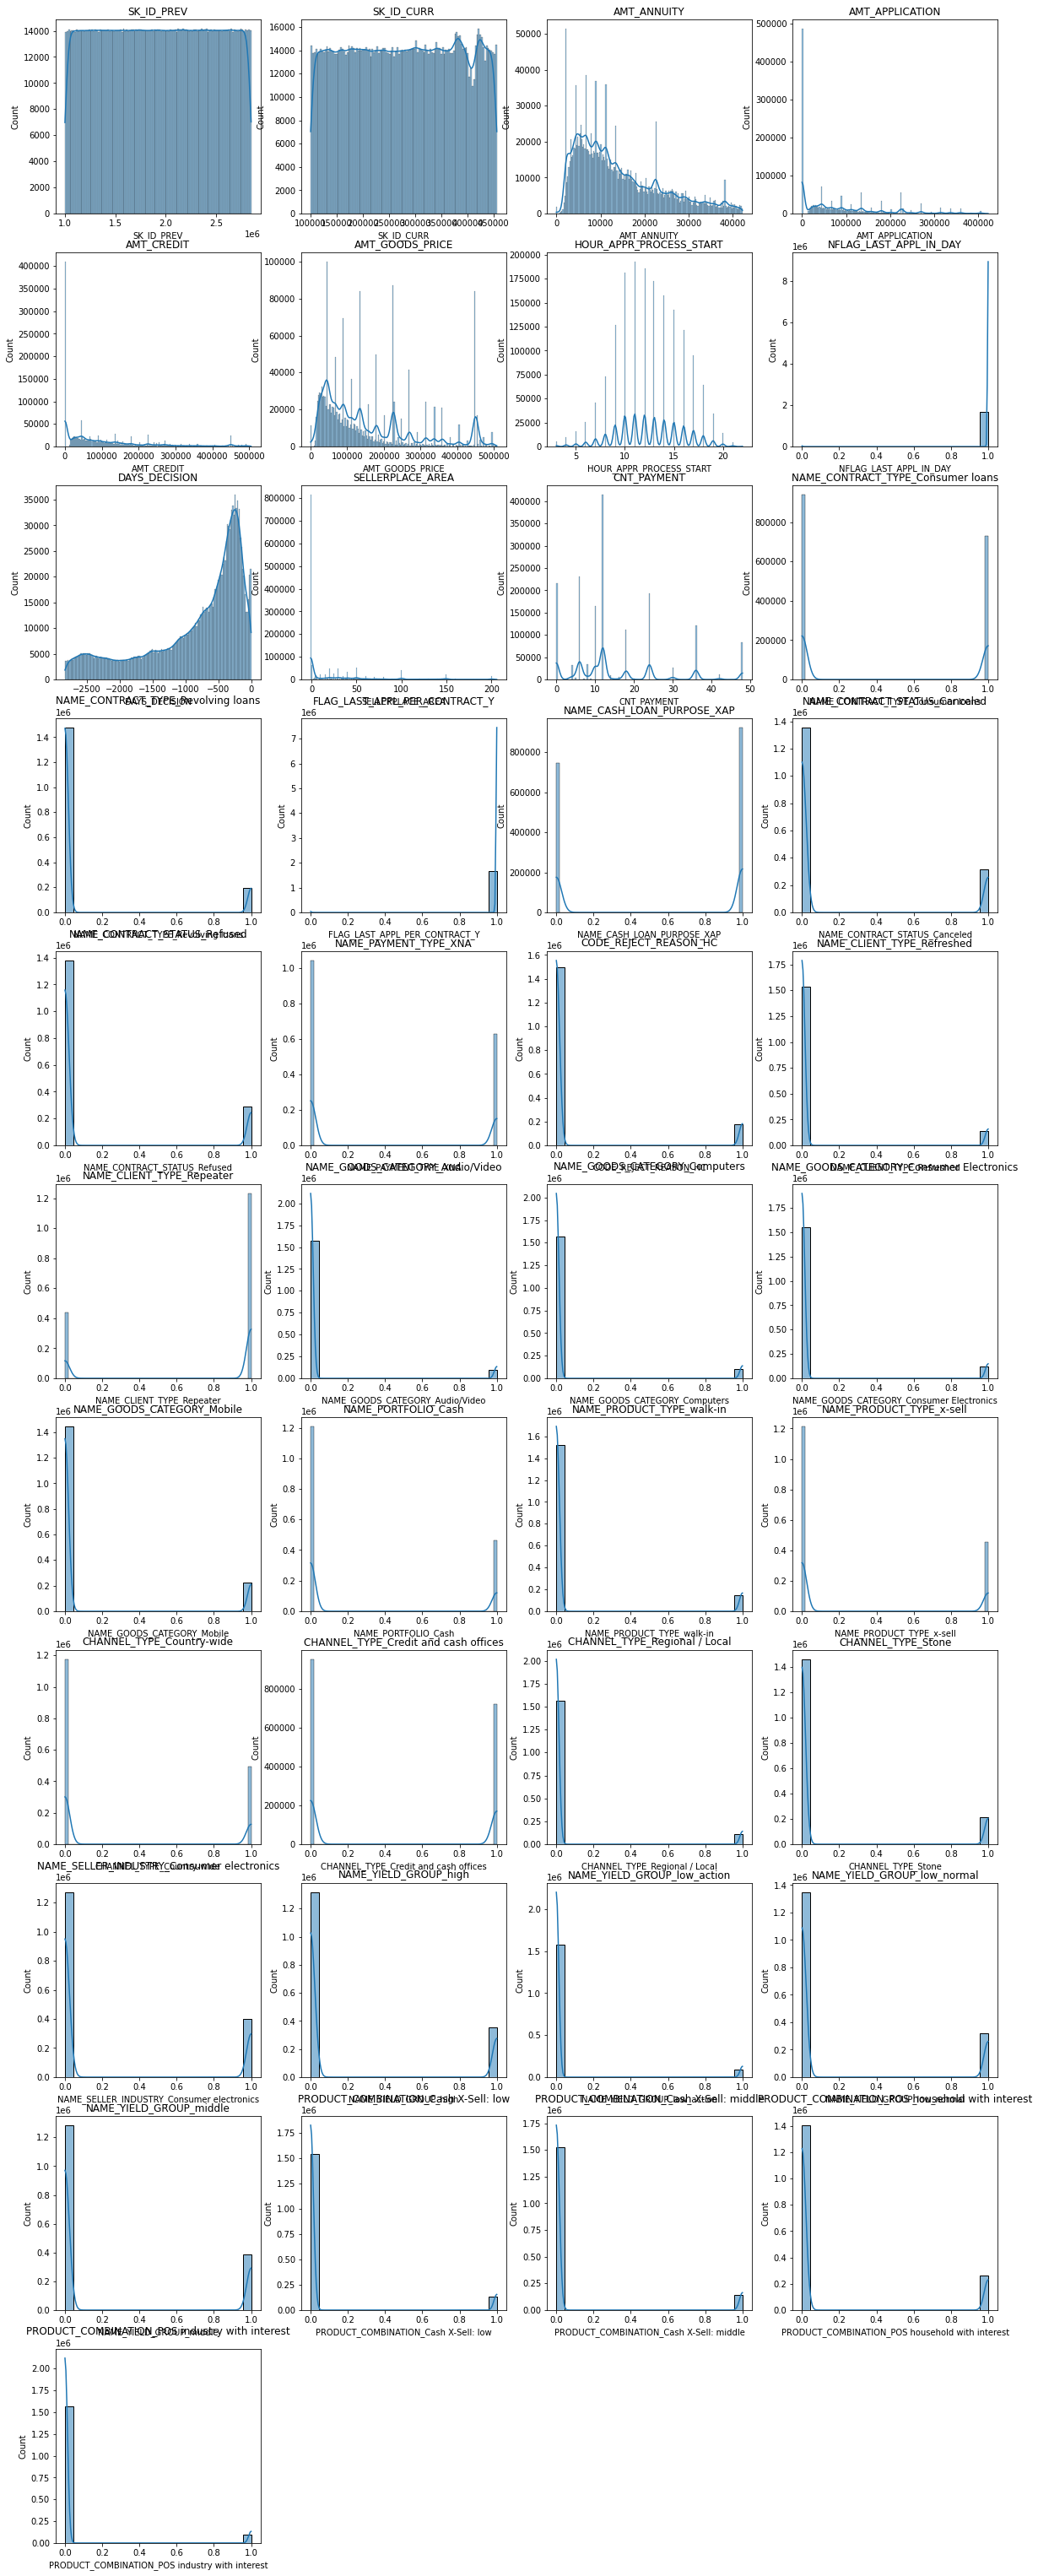

In [59]:
graficar_histogramas(df)

In [39]:
df = df.groupby("SK_ID_CURR").max()

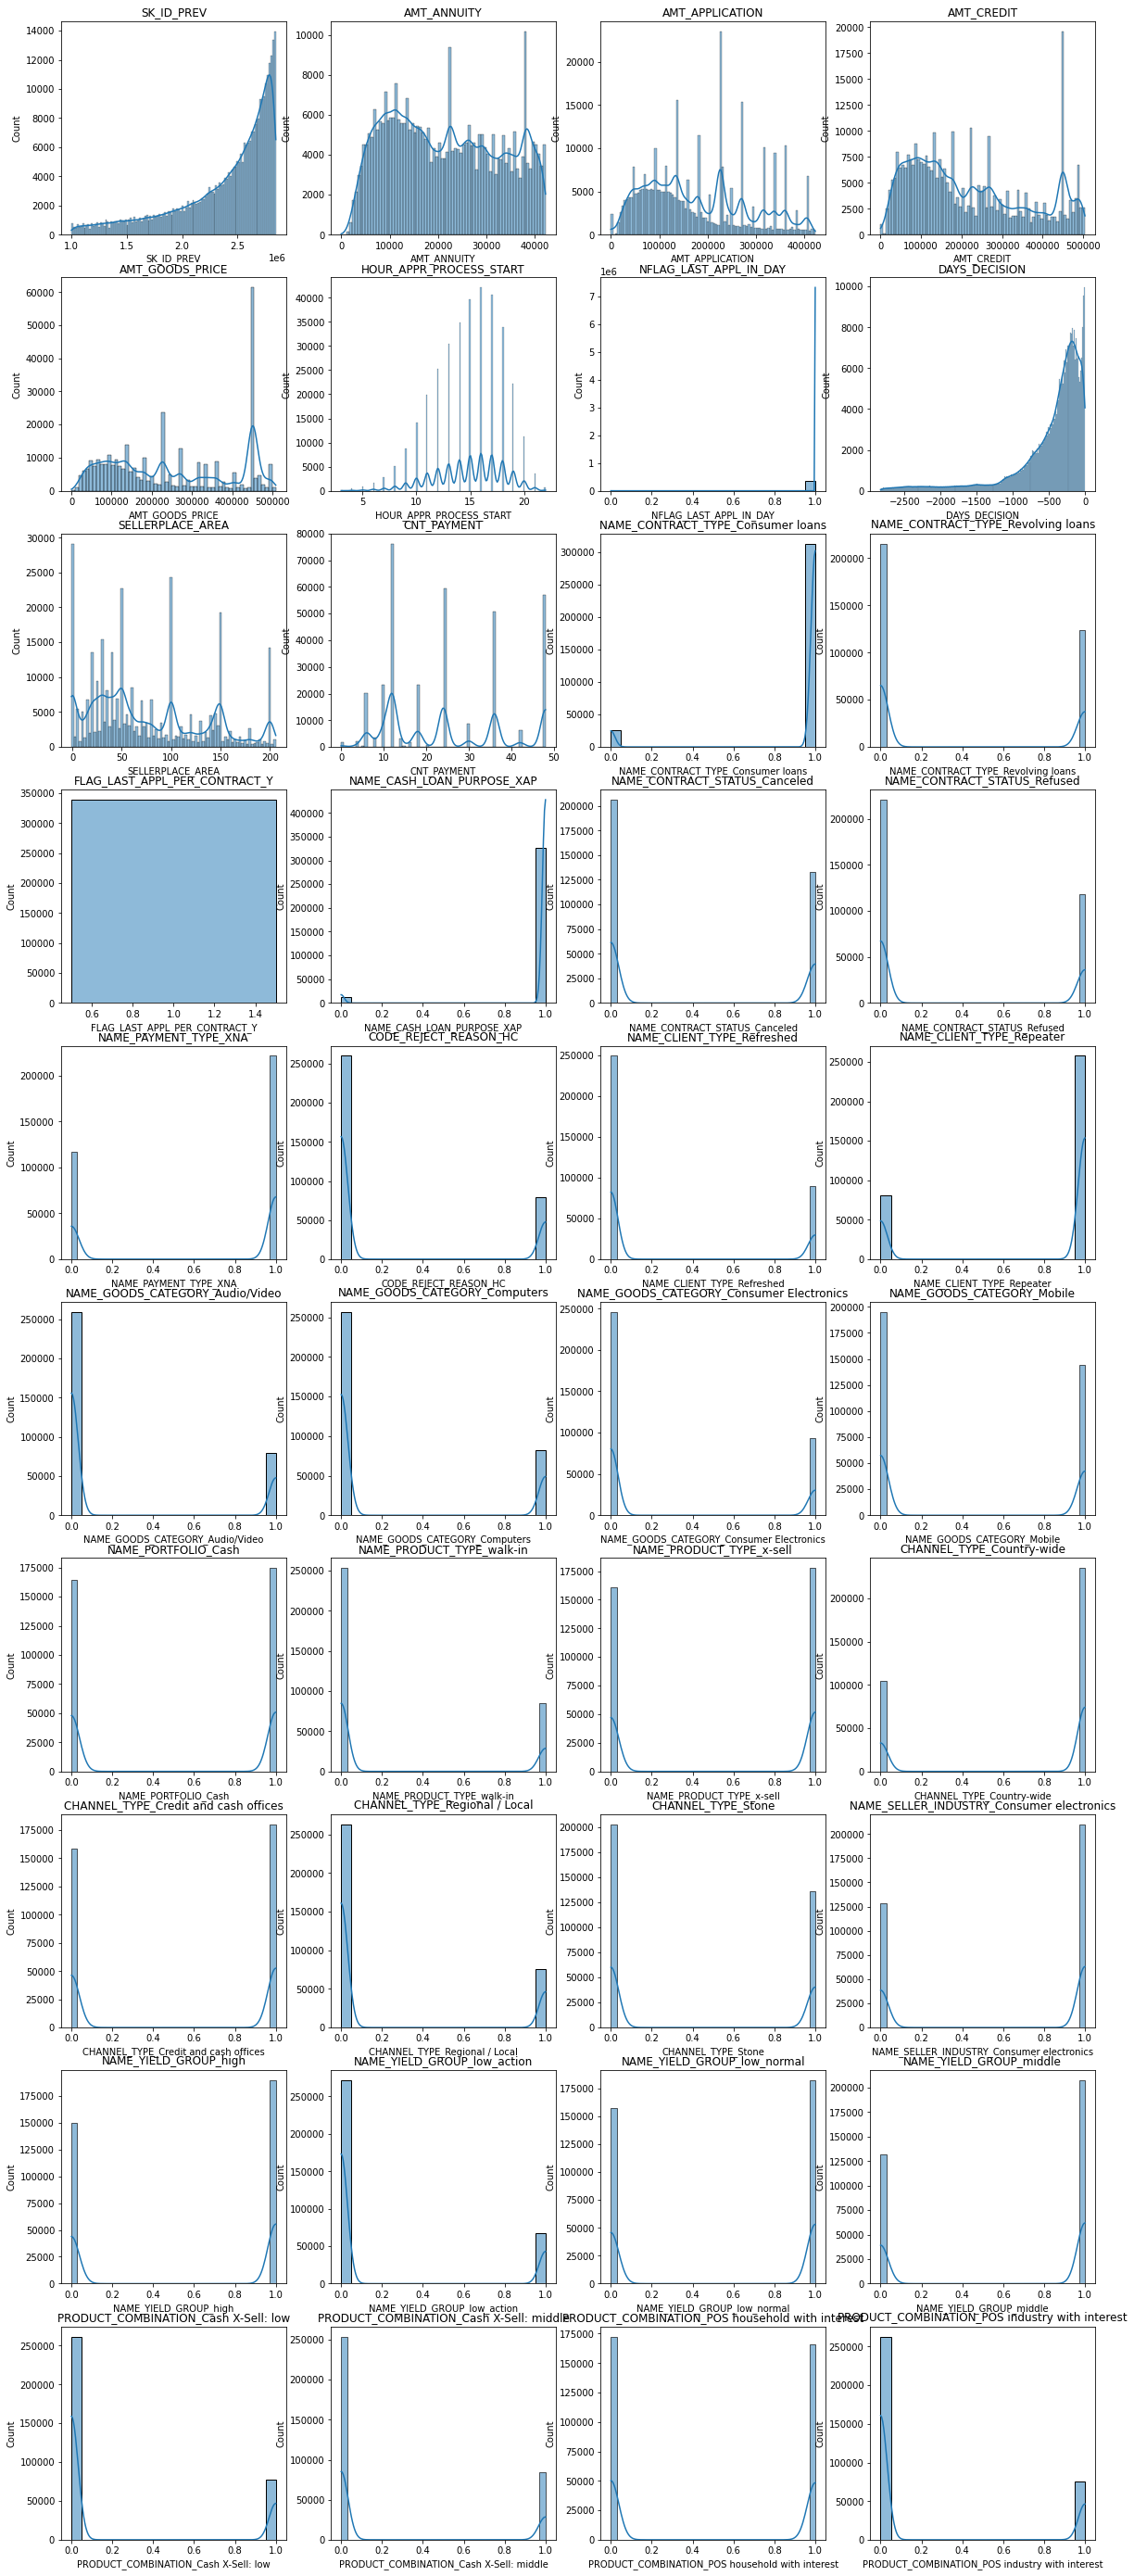

In [61]:
graficar_histogramas(df)

In [62]:
df = df.groupby("SK_ID_CURR").mean()

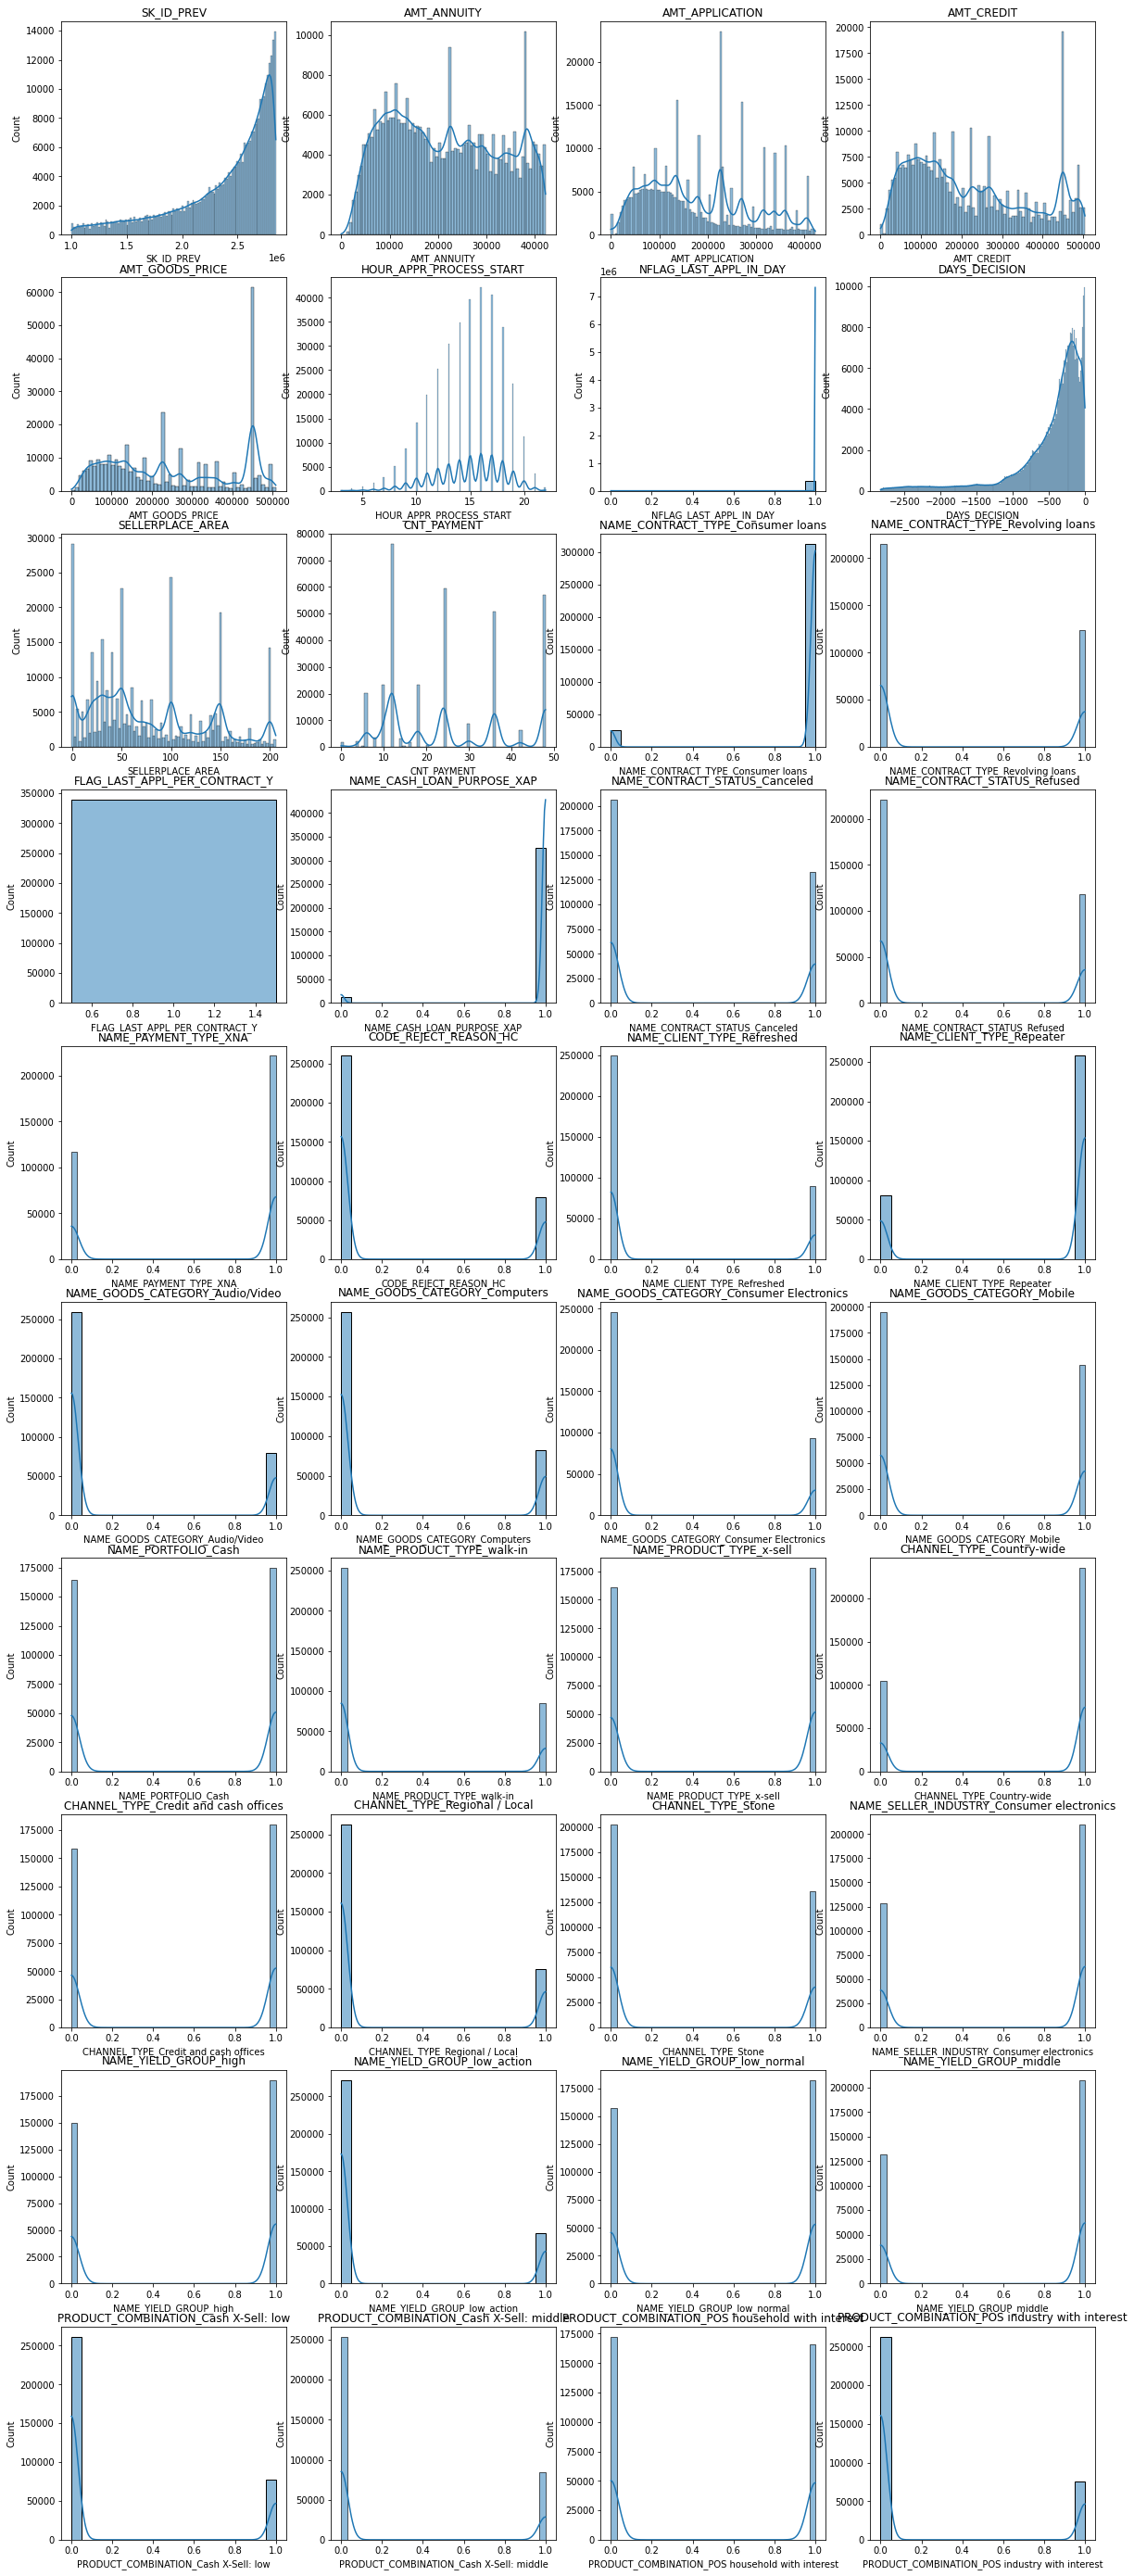

In [63]:
graficar_histogramas(df)

In [40]:
df = eliminar_columnas_quasiconstantes(df,.9)

In [41]:
df = df.reset_index()

In [42]:
df

,SK_ID_CURR,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,HOUR_APPR_PROCESS_START,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,NAME_PAYMENT_TYPE_XNA,NAME_CLIENT_TYPE_Repeater,NAME_PORTFOLIO_Cash,NAME_PRODUCT_TYPE_x-sell,CHANNEL_TYPE_Country-wide,CHANNEL_TYPE_Credit and cash offices
0,100001,1369693,3951.000000,24835.500000,13.0,-1740.000000,23.000000,8.00,0,0,0,0,1,0
1,100002,1038818,9251.775000,179055.000000,9.0,-606.000000,87.532787,24.00,1,0,0,0,0,0
2,100003,2636178,19427.552593,337500.000000,17.0,-746.000000,200.000000,12.00,1,1,1,1,1,1
3,100004,1564014,5357.250000,24282.000000,5.0,-815.000000,30.000000,4.00,0,0,0,0,0,0
4,100005,2495675,7658.482966,44617.500000,11.0,-315.000000,37.000000,12.68,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,456251,2248017,6605.910000,40455.000000,17.0,-273.000000,30.000000,8.00,0,0,0,0,1,0
338853,456252,1503599,10074.465000,57595.500000,10.0,-2497.000000,190.000000,6.00,0,0,0,0,1,0
338854,456253,1686207,5567.715000,28912.500000,12.0,-1202.036721,22.000000,6.00,0,1,0,0,0,0
338855,456254,2016407,19065.825000,223789.500000,18.0,-277.000000,87.532787,16.00,0,1,0,0,1,0


In [43]:
df.to_csv('prev_app.csv', index=False)
df.to_csv('/Users/wilbertpeniche/Desktop/homeCreditKaggle/credit risk /prev_app.csv',index= False)

In [44]:
df = pd.read_csv('/Users/wilbertpeniche/Desktop/homeCreditKaggle/credit risk /creditCard.csv')

In [85]:
df

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS_Active,AMT_BALANCE_neg,AMT_BALANCE_cero,AMT_RECEIVABLE_PRINCIPAL_cero,AMT_RECIVABLE_neg,AMT_RECIVABLE_cero
0,2562384,378907,-6.0,1,1,1,1,1,1,0,0,1,0,1
1,2582071,363914,-1.0,1,1,1,1,1,1,0,0,0,0,0
2,1740877,371185,-7.0,1,1,1,1,1,1,0,0,0,0,0
3,1389973,337855,-4.0,1,1,1,1,1,1,0,0,0,0,0
4,1891521,126868,-1.0,1,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9.0,1,0,1,0,0,1,0,1,1,0,1
3840308,1714892,347207,-9.0,1,0,1,0,1,1,0,1,1,0,1
3840309,1302323,215757,-9.0,1,1,0,0,1,1,0,1,1,0,1
3840310,1624872,430337,-10.0,1,0,0,0,0,1,0,1,1,0,1


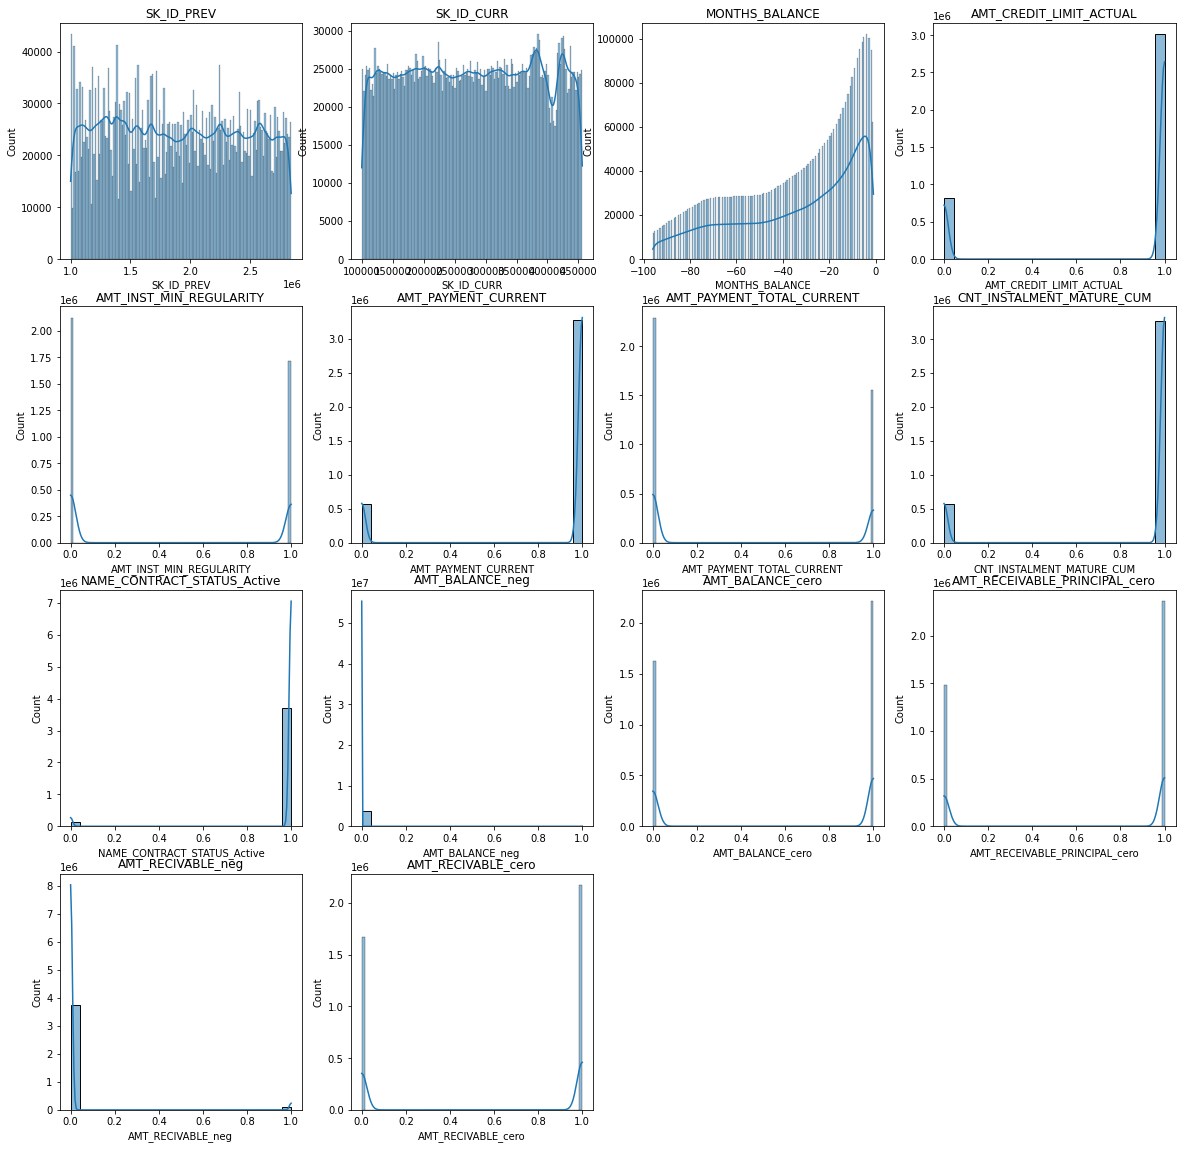

In [79]:
graficar_histogramas(df)

In [45]:
df = df.groupby("SK_ID_CURR").max()

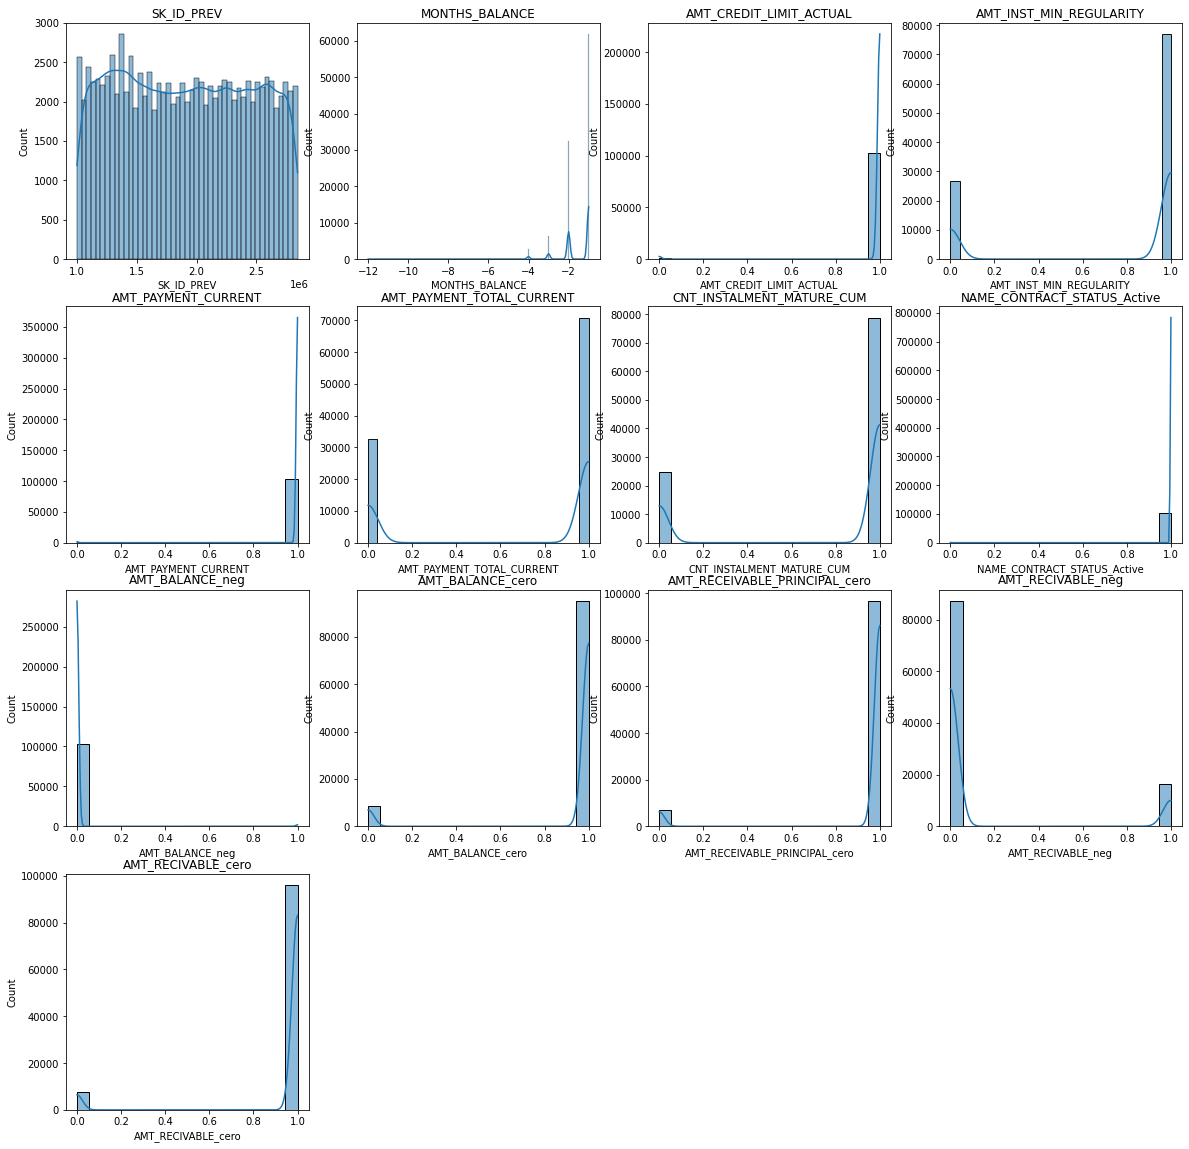

In [48]:
graficar_histogramas(df)

In [90]:
df = df.groupby("SK_ID_CURR").mean()

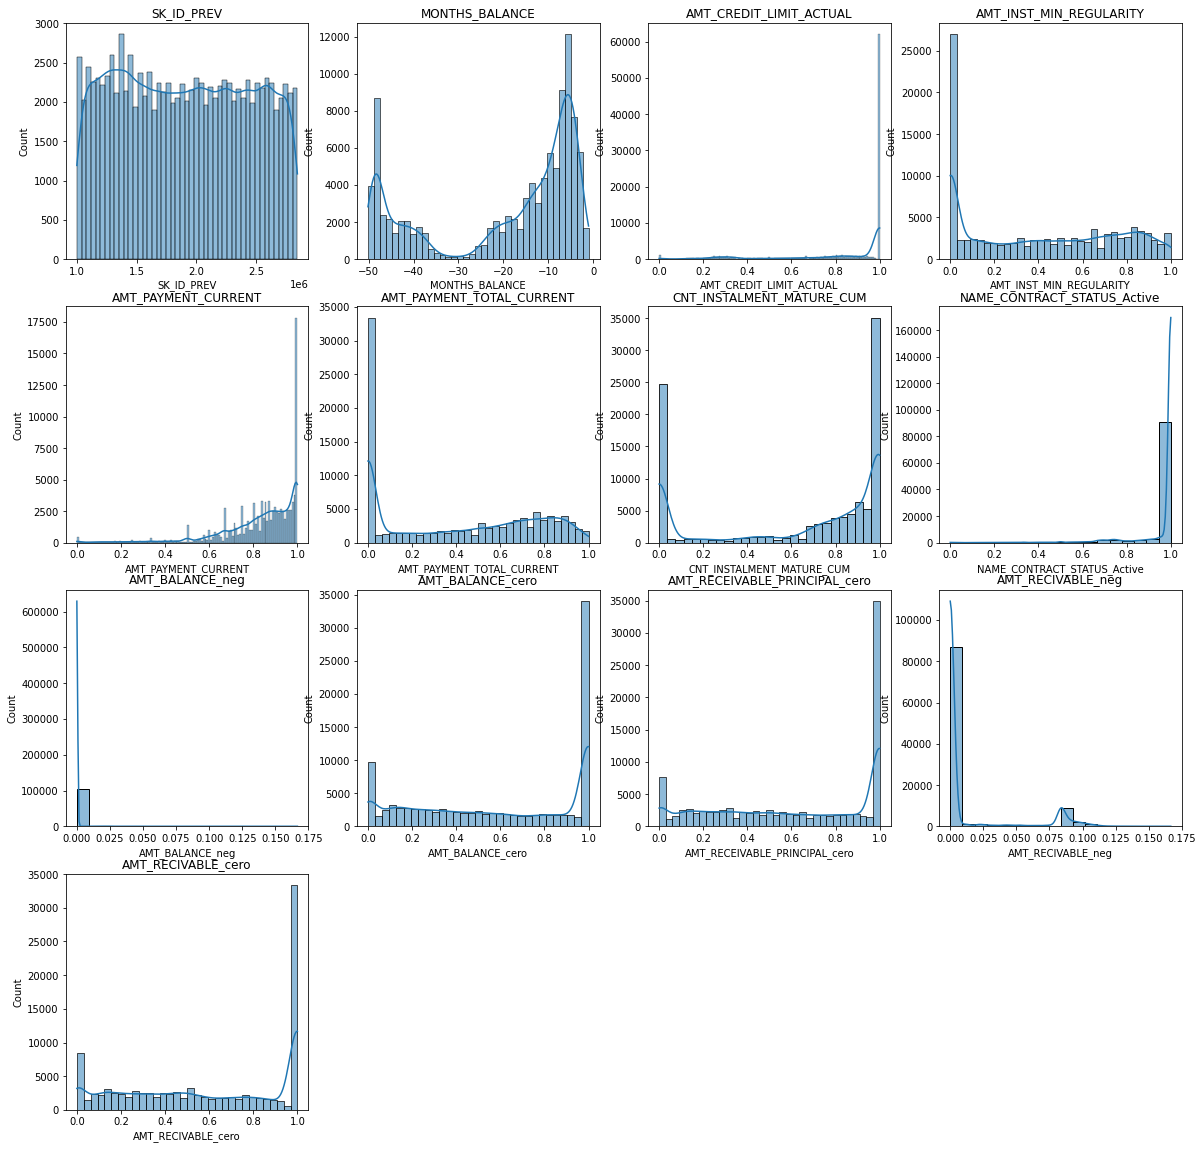

In [91]:
graficar_histogramas(df)

In [46]:
df = df.reset_index()

In [48]:
df.to_csv('creditCard.csv', index=False)
df.to_csv('/Users/wilbertpeniche/Desktop/homeCreditKaggle/credit risk /creditCard.csv',index= False)

In [127]:
df = pd.read_csv('/Users/wilbertpeniche/Desktop/homeCreditKaggle/credit risk /app_train_cleaned.csv')

In [128]:
df

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,FLAG_DOCUMENT_3
0,100002,1,1,202500.0,406597.5,24700.5,-9461,-637.000000,-3648.0,-2120,1.0,1
1,100003,0,0,270000.0,1293502.5,35698.5,-16765,-1188.000000,-1186.0,-291,2.0,1
2,100004,0,1,67500.0,135000.0,6750.0,-19046,-225.000000,-4260.0,-2531,1.0,0
3,100006,0,1,135000.0,312682.5,29686.5,-19005,-3039.000000,-9833.0,-2437,2.0,1
4,100007,0,1,121500.0,513000.0,21865.5,-19932,-3038.000000,-4311.0,-3458,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,-9327,-236.000000,-8456.0,-1982,1.0,0
307507,456252,0,1,72000.0,269550.0,12001.5,-20775,-1837.193259,-4388.0,-4090,1.0,1
307508,456253,0,1,153000.0,677664.0,29979.0,-14966,-1837.193259,-6737.0,-5150,1.0,1
307509,456254,1,1,171000.0,370107.0,20205.0,-11961,-4786.000000,-2562.0,-931,2.0,1


In [129]:
df1 = pd.read_csv('/Users/wilbertpeniche/Desktop/homeCreditKaggle/credit risk /bC.csv')

In [130]:
df2 = pd.read_csv('/Users/wilbertpeniche/Desktop/homeCreditKaggle/credit risk /creditCard.csv')

In [131]:
df3 = pd.read_csv('/Users/wilbertpeniche/Desktop/homeCreditKaggle/credit risk /prev_app.csv')

In [132]:
df4 = pd.read_csv('/Users/wilbertpeniche/Desktop/homeCreditKaggle/credit risk /insPay.csv')

In [133]:
df1

,SK_ID_CURR,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,NAME_CONTRACT_TYPE_Consumer loans,...,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS mobile with interest
0,100001,1369693,3951.000000,1,13.0,1.0,-1740.000000,23.000000,8.00,1,...,0,0,0,0,0,0,0,0,0,0
1,100002,1038818,9251.775000,1,9.0,1.0,-606.000000,87.532787,24.00,1,...,0,0,0,0,0,0,0,0,0,0
2,100003,2636178,19427.552593,1,17.0,1.0,-746.000000,200.000000,12.00,1,...,0,0,0,0,0,0,0,0,0,0
3,100004,1564014,5357.250000,1,5.0,1.0,-815.000000,30.000000,4.00,1,...,0,0,0,0,0,0,0,0,0,0
4,100005,2495675,7658.482966,1,11.0,1.0,-315.000000,37.000000,12.68,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,456251,2248017,6605.910000,1,17.0,1.0,-273.000000,30.000000,8.00,1,...,0,0,0,0,0,0,0,0,0,0
338853,456252,1503599,10074.465000,1,10.0,1.0,-2497.000000,190.000000,6.00,1,...,0,0,0,0,0,0,0,0,0,0
338854,456253,1686207,5567.715000,1,12.0,1.0,-1202.036721,22.000000,6.00,1,...,0,0,0,0,0,0,0,0,0,0
338855,456254,2016407,19065.825000,1,18.0,1.0,-277.000000,87.532787,16.00,1,...,0,0,0,0,0,0,0,0,0,0


In [134]:
df = pd.merge(df, df1, on='SK_ID_CURR', how='left')

In [135]:
df

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS mobile with interest
0,100002,1,1,202500.0,406597.5,24700.5,-9461,-637.000000,-3648.0,-2120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,-16765,-1188.000000,-1186.0,-291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,67500.0,135000.0,6750.0,-19046,-225.000000,-4260.0,-2531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,1,135000.0,312682.5,29686.5,-19005,-3039.000000,-9833.0,-2437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,1,121500.0,513000.0,21865.5,-19932,-3038.000000,-4311.0,-3458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,-9327,-236.000000,-8456.0,-1982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,1,72000.0,269550.0,12001.5,-20775,-1837.193259,-4388.0,-4090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,1,153000.0,677664.0,29979.0,-14966,-1837.193259,-6737.0,-5150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,456254,1,1,171000.0,370107.0,20205.0,-11961,-4786.000000,-2562.0,-931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
df = df.fillna(0)

In [137]:
df

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS mobile with interest
0,100002,1,1,202500.0,406597.5,24700.5,-9461,-637.000000,-3648.0,-2120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,-16765,-1188.000000,-1186.0,-291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,67500.0,135000.0,6750.0,-19046,-225.000000,-4260.0,-2531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,1,135000.0,312682.5,29686.5,-19005,-3039.000000,-9833.0,-2437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,1,121500.0,513000.0,21865.5,-19932,-3038.000000,-4311.0,-3458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,-9327,-236.000000,-8456.0,-1982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,1,72000.0,269550.0,12001.5,-20775,-1837.193259,-4388.0,-4090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,1,153000.0,677664.0,29979.0,-14966,-1837.193259,-6737.0,-5150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,456254,1,1,171000.0,370107.0,20205.0,-11961,-4786.000000,-2562.0,-931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
df = pd.merge(df, df2, on='SK_ID_CURR', how='left')

In [139]:
df4

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1851984,1,4.0,-1619.0,17397.900,17397.900
1,1038818,1,19.0,-25.0,9251.775,9251.775
2,2636178,1,12.0,-536.0,25396.335,25396.335
3,1564014,1,3.0,-724.0,10573.965,10573.965
4,2495675,1,9.0,-466.0,17656.245,17656.245
...,...,...,...,...,...,...
339582,2248017,1,7.0,-30.0,12815.010,12815.010
339583,1503599,1,6.0,-2316.0,10074.465,10074.465
339584,2029307,1,12.0,-1716.0,5575.185,5575.185
339585,2016407,1,10.0,-7.0,19065.825,19065.825


In [140]:
df = pd.merge(df, df3, on='SK_ID_CURR', how='left')

In [141]:
df

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,HOUR_APPR_PROCESS_START_y,DAYS_DECISION_y,SELLERPLACE_AREA_y,CNT_PAYMENT_y,NAME_PAYMENT_TYPE_XNA_y,NAME_CLIENT_TYPE_Repeater_y,NAME_PORTFOLIO_Cash_y,NAME_PRODUCT_TYPE_x-sell_y,CHANNEL_TYPE_Country-wide_y,CHANNEL_TYPE_Credit and cash offices_y
0,100002,1,1,202500.0,406597.5,24700.5,-9461,-637.000000,-3648.0,-2120,...,9.0,-606.000000,87.532787,24.0,1.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,-16765,-1188.000000,-1186.0,-291,...,17.0,-746.000000,200.000000,12.0,1.0,1.0,1.0,1.0,1.0,1.0
2,100004,0,1,67500.0,135000.0,6750.0,-19046,-225.000000,-4260.0,-2531,...,5.0,-815.000000,30.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,1,135000.0,312682.5,29686.5,-19005,-3039.000000,-9833.0,-2437,...,15.0,-181.000000,87.532787,48.0,1.0,1.0,1.0,1.0,1.0,1.0
4,100007,0,1,121500.0,513000.0,21865.5,-19932,-3038.000000,-4311.0,-3458,...,15.0,-374.000000,57.786318,48.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,-9327,-236.000000,-8456.0,-1982,...,17.0,-273.000000,30.000000,8.0,0.0,0.0,0.0,0.0,1.0,0.0
307507,456252,0,1,72000.0,269550.0,12001.5,-20775,-1837.193259,-4388.0,-4090,...,10.0,-2497.000000,190.000000,6.0,0.0,0.0,0.0,0.0,1.0,0.0
307508,456253,0,1,153000.0,677664.0,29979.0,-14966,-1837.193259,-6737.0,-5150,...,12.0,-1202.036721,22.000000,6.0,0.0,1.0,0.0,0.0,0.0,0.0
307509,456254,1,1,171000.0,370107.0,20205.0,-11961,-4786.000000,-2562.0,-931,...,18.0,-277.000000,87.532787,16.0,0.0,1.0,0.0,0.0,1.0,0.0


In [142]:
df = df.fillna(0)

In [143]:
df = pd.merge(df, df4, on='SK_ID_PREV', how='left')

In [144]:
df = df.fillna(0)

In [145]:
df

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NAME_CLIENT_TYPE_Repeater_y,NAME_PORTFOLIO_Cash_y,NAME_PRODUCT_TYPE_x-sell_y,CHANNEL_TYPE_Country-wide_y,CHANNEL_TYPE_Credit and cash offices_y,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100002,1,1,202500.0,406597.5,24700.5,-9461,-637.000000,-3648.0,-2120,...,0.0,0.0,0.0,0.0,0.0,1.0,19.0,-25.0,9251.775,9251.775
1,100003,0,0,270000.0,1293502.5,35698.5,-16765,-1188.000000,-1186.0,-291,...,1.0,1.0,1.0,1.0,1.0,1.0,12.0,-536.0,25396.335,25396.335
2,100004,0,1,67500.0,135000.0,6750.0,-19046,-225.000000,-4260.0,-2531,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-724.0,10573.965,10573.965
3,100006,0,1,135000.0,312682.5,29686.5,-19005,-3039.000000,-9833.0,-2437,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000,0.000
4,100007,0,1,121500.0,513000.0,21865.5,-19932,-3038.000000,-4311.0,-3458,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,-9327,-236.000000,-8456.0,-1982,...,0.0,0.0,0.0,1.0,0.0,1.0,7.0,-30.0,12815.010,12815.010
307507,456252,0,1,72000.0,269550.0,12001.5,-20775,-1837.193259,-4388.0,-4090,...,0.0,0.0,0.0,1.0,0.0,1.0,6.0,-2316.0,10074.465,10074.465
307508,456253,0,1,153000.0,677664.0,29979.0,-14966,-1837.193259,-6737.0,-5150,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000
307509,456254,1,1,171000.0,370107.0,20205.0,-11961,-4786.000000,-2562.0,-931,...,1.0,0.0,0.0,1.0,0.0,1.0,10.0,-7.0,19065.825,19065.825


In [146]:
df.to_csv('ultimateDf1.csv', index=False)
df.to_csv('/Users/wilbertpeniche/Desktop/homeCreditKaggle/credit risk /ultimateDf1.csv',index= False)